# Insurance Analysis with Probability
---

In [43]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv('D:/pacmann/prob remed/insurance.csv')

In [45]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
df['charges'].max()

63770.42801

In [47]:
df.shape

(1338, 7)

In [48]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## LANGKAH 1

1. Rata-rata umur pengguna asuransi

In [49]:
df['age'].mean()

39.20702541106129

2. Rata-rata tagihan perokok vs tidak perokok

In [50]:
df_mean_smoker = df.loc[df['smoker'] == 'yes', 'charges'].mean()
print('rata tagihan perokok adalah:', df_mean_smoker)

df_mean_non_smoker = df.loc[df['smoker'] == 'no', 'charges'].mean()
print('rata tagihan perokok adalah:', df_mean_non_smoker)

rata tagihan perokok adalah: 32050.23183153285
rata tagihan perokok adalah: 8434.268297856199


3. Variansi tagihan dalam perokok vs tidak merokok

In [51]:
df_var_smoker = df.loc[df['smoker'] == 'yes', 'charges'].var()
print('variansi tagihan perokok adalah:', df_var_smoker)

df_var_non_smoker = df.loc[df['smoker'] == 'no', 'charges'].var()
print('variansi tagihan perokok adalah:', df_var_non_smoker)

variansi tagihan perokok adalah: 133207311.20634921
variansi tagihan perokok adalah: 35925420.49611172


4. BMI perokok vs non perokok

In [52]:
bmi_smoker = df.loc[df['smoker'] == 'yes', 'bmi'].mean()
print('rata-rata BMI perokok', bmi_smoker)

bmi_non_smoker = df.loc[df['smoker'] == 'no', 'bmi'].mean()
print('rata-rata BMI non perokok', bmi_non_smoker)

rata-rata BMI perokok 30.708448905109503
rata-rata BMI non perokok 30.651795112781922


5. BMI laki-laki dan perempuan

In [53]:
bmi_women = df.loc[df['sex'] == 'female', 'bmi'].mean()
print('rata-rata BMI perempuan:', bmi_women)

bmi_men = df.loc[df['sex'] == 'male', 'bmi'].mean()
print('rata-rata BMI laki-laki:', bmi_men)

rata-rata BMI perempuan: 30.377749244713023
rata-rata BMI laki-laki: 30.943128698224832


### LANGKAH 2

1. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [54]:
n_smokers = (df['smoker'] == 'yes').sum()
n_total = len(df)
p_smoker = n_smokers / n_total

n_males = (df['sex'] == 'male').sum()
p_male = n_males / n_total

In [55]:
smokers_male = df.loc[(df['sex'] == 'male') & (df['smoker'] == 'yes')]
n_smokers_male = len(smokers_male)
p_smoker_given_male = n_smokers_male / n_males

In [56]:
p_male_given_smoker = (p_smoker_given_male * p_male) / p_smoker
print('Peluang seseorang adalah laki-laki diketahui dia adalah perokok:', p_male_given_smoker)

Peluang seseorang adalah laki-laki diketahui dia adalah perokok: 0.5802919708029198


2. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [57]:
n_females = (df['sex'] == 'female').sum()
p_female = n_females / n_total

In [58]:
smokers_female = df.loc[(df['sex'] == 'female') & (df['smoker'] == 'yes')]
n_smokers_female = len(smokers_female)
p_smoker_given_female = n_smokers_female / n_females

In [59]:
p_female_given_smoker = (p_smoker_given_female * p_female) / p_smoker
print('Peluang seseorang adalah perempuan diketahui dia adalah perokok:', p_female_given_smoker)

Peluang seseorang adalah perempuan diketahui dia adalah perokok: 0.4197080291970803


3. Gender mana yang memiliki tagihan paling tinggi?

In [60]:
male_charges = df.loc[df['sex'] == 'male', 'charges'].sum()
female_charges = df.loc[df['sex'] == 'female', 'charges'].sum()

male_charges_avg = df.loc[df['sex'] == 'male', 'charges'].mean()
female_charges_avg = df.loc[df['sex'] == 'female', 'charges'].mean()

print('tagihan pengguna asuransi laki-laki sebesar', male_charges)
print('tagihan pengguna asuransi perempuan sebesar', female_charges)

print('tagihan pengguna asuransi laki-laki sebesar', male_charges_avg)
print('tagihan pengguna asuransi perempuan sebesar', female_charges_avg)

tagihan pengguna asuransi laki-laki sebesar 9434763.79614
tagihan pengguna asuransi perempuan sebesar 8321061.194619
tagihan pengguna asuransi laki-laki sebesar 13956.751177721886
tagihan pengguna asuransi perempuan sebesar 12569.57884383534


4. Proporsi perokok dengan non perokok

In [61]:
n_smokers = (df['smoker'] == 'yes').sum()
n_non_smokers = (df['smoker'] == 'no').sum()
n_total = len(df)

p_smokers = n_smokers / n_total
p_non_smokers = n_non_smokers / n_total

print('proporsi pengguna perokok adalah', p_smokers)
print('proporsi pengguna non-perokok adalah', p_non_smokers)

proporsi pengguna perokok adalah 0.20478325859491778
proporsi pengguna non-perokok adalah 0.7952167414050823


5. Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [62]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [63]:
region = df.groupby(['region'])['region'].count()
p_region = region / n_total
p_region

region
northeast    0.242152
northwest    0.242900
southeast    0.272048
southwest    0.242900
Name: region, dtype: float64

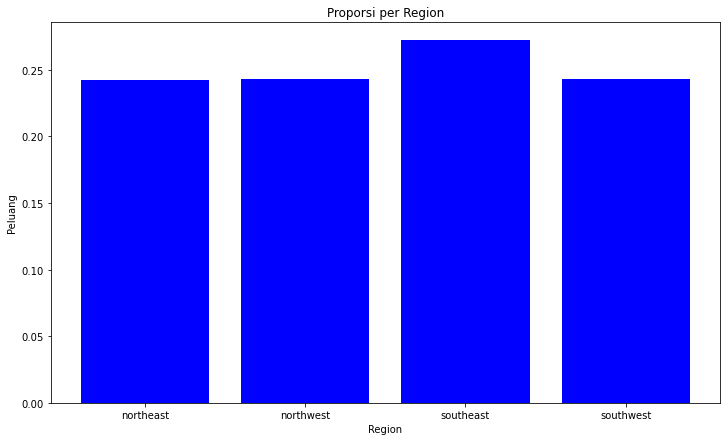

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,7))
plt.bar(p_region.index, p_region.values, color = 'blue')

plt.title('Proporsi per Region')
plt.xlabel('Region')
plt.ylabel('Peluang')

# Tampilkan plot
plt.show()

### LANGKAH 3

1. Mencari peluang besar tagihan berdasarkan BMI

In [65]:
charges = df['charges']
bmi = df['bmi']

mean = charges.mean()
var = charges.var()

from scipy.stats import norm

x = 0
std = np.sqrt(var)

P_1 = 1 - norm.cdf(x, mean, std)

print('Peluang tagihan:', P_1)

Peluang tagihan: 0.8634217605600918


2. Mencari kemungkin terjadi, seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700.

In [66]:
from scipy.stats import norm

x = 16700
std = np.sqrt(var)

# filter bmi greater than 25 and charges greater than x
bmi_filtered = bmi[(bmi > 25) & (charges > x)]
mean_filtered = charges[(bmi > 25) & (charges > x)].mean()
var_filtered = charges[(bmi > 25) & (charges > x)].var()

P_bmi_above_25 = 1 - norm.cdf(x, mean_filtered, np.sqrt(var_filtered))

print('Peluang tagihan di atas 16.700 untuk BMI di atas 25:', P_bmi_above_25)

Peluang tagihan di atas 16.700 untuk BMI di atas 25: 0.9347041068906858


3. Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok

In [67]:
smoker = df['smoker']

x = 16700
std = np.sqrt(var)

# filter smokers
smoker_filtered = smoker[smoker == 'yes']
mean_filtered = charges[smoker == 'yes'].mean()
var_filtered = charges[smoker == 'yes'].var()

P_rokok = 1 - norm.cdf(x, mean_filtered, np.sqrt(var_filtered))

print('Peluang tagihan di atas 16.700 untuk pengguna asuransi yang merokok:', P_rokok)

Peluang tagihan di atas 16.700 untuk pengguna asuransi yang merokok: 0.9082404944909883


4. Mana yang lebih mungkin terjadi

In [68]:
from scipy.stats import norm

x = 16700
std = np.sqrt(var)

# filter bmi greater than 25 and charges greater than x
bmi_filtered = bmi[(bmi < 25) & (charges > x)]
mean_filtered = charges[(bmi < 25) & (charges > x)].mean()
var_filtered = charges[(bmi < 25) & (charges > x)].var()

P_bmi_under_25 = 1 - norm.cdf(x, mean_filtered, np.sqrt(var_filtered))

print('Peluang tagihan di atas 16.700 untuk BMI di atas 25:', P_bmi_under_25)

Peluang tagihan di atas 16.700 untuk BMI di atas 25: 0.9207283261604335


5. Mana yang lebih mungkin terjadi

In [69]:
from scipy.stats import norm

x = 16700
std = np.sqrt(var)

# filter BMI and smokers
bmi_filtered = bmi[bmi > 25]
smoker_filtered = smoker[smoker == 'yes']
mean_filtered = charges[(bmi > 25) & (smoker == 'yes')].mean()
var_filtered = charges[(bmi > 25) & (smoker == 'yes')].var()

P_rokok_bmi_above_25 = 1 - norm.cdf(x, mean_filtered, np.sqrt(var_filtered))

print('Peluang tagihan di atas 16.700 untuk pengguna asuransi yang merokok dan BMI di atas 25:', P_rokok_bmi_above_25)

Peluang tagihan di atas 16.700 untuk pengguna asuransi yang merokok dan BMI di atas 25: 0.9573559499024568


In [70]:
from scipy.stats import norm

x = 16700
std = np.sqrt(var)

# filter BMI and smokers
bmi_filtered = bmi[bmi > 25]
smoker_filtered = smoker[smoker == 'no']
mean_filtered = charges[(bmi > 25) & (smoker == 'no')].mean()
var_filtered = charges[(bmi > 25) & (smoker == 'no')].var()

P_tidak_rokok_bmi_above_25 = 1 - norm.cdf(x, mean_filtered, np.sqrt(var_filtered))

print('Peluang tagihan di atas 16.700 untuk pengguna asuransi yang tidak merokok dan BMI di atas 25:', P_tidak_rokok_bmi_above_25)

Peluang tagihan di atas 16.700 untuk pengguna asuransi yang tidak merokok dan BMI di atas 25: 0.09076840690505361


### LANGKAH 4

In [71]:
cov_smokers = np.stack((df['charges'], (df['smoker'] == 'yes').astype(int)), axis=0)


covariance = np.cov(cov_smokers, ddof = 1)
covariance

array([[1.46652372e+08, 3.84866703e+03],
       [3.84866703e+03, 1.62968876e-01]])

In [72]:
cov_non_smokers = np.stack((df['charges'], (df['smoker'] == 'no').astype(int)), axis=0)


covariance = np.cov(cov_non_smokers)
covariance

array([[ 1.46652372e+08, -3.84866703e+03],
       [-3.84866703e+03,  1.62968876e-01]])

In [73]:
df_new = df.replace({'smoker': {'no': 0, 'yes': 1}})

In [74]:
df_new1 = df_new.replace({'sex': {'female': 0, 'male': 1}})

In [75]:
correlations = df_new1.corr()['charges']
correlations

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

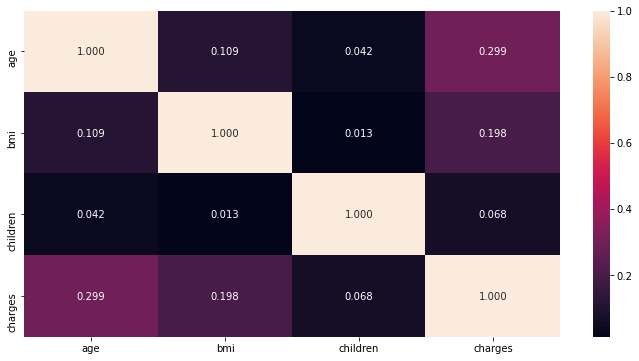

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,fmt='.3f')
plt.show()

### LANGKAH 5

1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

T-Test

In [77]:
alpha = 0.05

from scipy.stats import ttest_ind

charges_per_smoker = [df[df['smoker'] == 'yes']['charges'], df[df['smoker'] == 'no']['charges']]

# Uji perbedaan rata-rata antara kedua kelompok menggunakan t-test
stat, p = ttest_ind(charges_per_smoker[0], charges_per_smoker[1], equal_var=False, alternative='two-sided')

print('T-statistic = %.4f, p-value = %.4f' % (stat, p))

T-statistic = 32.7519, p-value = 0.0000


In [78]:
if p < 0.05:
    print('T-value = %.4f, p-value = %.4f. Terdapat bukti yang cukup untuk menolak hipotesis null.' % (stat, p))
else:
    print('T-value = %.4f, p-value = %.4f. Tidak terdapat bukti yang cukup untuk menolak hipotesis null.' % (stat, p))

T-value = 32.7519, p-value = 0.0000. Terdapat bukti yang cukup untuk menolak hipotesis null.


Z-Test

In [79]:
from statsmodels.stats.weightstats import ztest

smoker_charges = df[df['smoker'] == 'yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']

z_score, p_value = ztest(x1=smoker_charges, x2=non_smoker_charges, alternative='larger')

print('Z-score:', z_score)
print('P-value:', p_value)

Z-score: 46.66492117272371
P-value: 0.0


In [80]:
alpha = 0.05
if p < alpha:
    print('Z-score = %.4f, p-value = %.4f. Terdapat bukti yang cukup untuk menolak hipotesis null.' % (stat, p))
else:
    print('Z-score = %.4f, p-value = %.4f. Tidak terdapat bukti yang cukup untuk menolak hipotesis null.' % (stat, p))

Z-score = 32.7519, p-value = 0.0000. Terdapat bukti yang cukup untuk menolak hipotesis null.


**dikarenakan data yang digunakan lebih dari 30 maka dianjurkan menggunakan Z-Test**

2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

In [81]:
from statsmodels.stats.weightstats import ztest

bmi_above_25_charges = df[df['bmi'] > 25]['charges']
bmi_below_25_charges = df[df['bmi'] < 25]['charges']

z_score1, p_value1 = ztest(x1=bmi_above_25_charges, x2=bmi_below_25_charges, alternative='larger')

print('Z-score:', z_score1)
print('P-value:', p_value1)

Z-score: 4.305033989510502
P-value: 8.348004956755111e-06


In [82]:
alpha = 0.05
if p_value1 < alpha:
    print("menolak H0.")
else:
    print("gagal menolak H0.")

menolak H0.


3. BMI laki-laki dan perempuan sama

In [83]:
from statsmodels.stats.weightstats import ztest

bmi_male = df[df['sex'] == 'male']['bmi']
bmi_female = df[df['sex'] == 'female']['bmi']

z_score2, p_value2 = ztest(x1=bmi_male, x2=bmi_female, alternative='larger')

print('Z-score:', z_score2)
print('P-value:', p_value2)

Z-score: 1.6967526357522242
P-value: 0.04487171839971956


In [84]:
if p_value2 < 0.05:
    print("menolak H0.")
else:
    print("gagal menolak H0.")

menolak H0.
